## Predicting Observation Steps with Decision Tree Classifier
To accurately model a shuttlecock's trajectory across the X, Y, and Z dimensions of a badminton court, we first predict the number of observation steps (sequences) for an observation group. Once determined, we can then predict the shuttlecock's coordinates at each step. 

A Decision Tree Classifier was used to classify and predict the number of observation steps. 
### Importing libraries and dependencies


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os

# data mining and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import learning_curve
import joblib

# visualization
import matplotlib.pyplot as plt

### Prepare data for Decision Tree Classifier
To train the Decision Tree model, we select a subset of features (X) that capture key factors influencing the shuttlecock’s trajectory. Since all values are already in appropriate units, no normalization is required. The selected features are:
- 'HUMAN PLAYER POSITION (X) metres'
- 'HUMAN PLAYER POSITION (Y) metres'
- 'HUMAN PLAYER POSITION (Z) metres'
- 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)'
- 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)'
- 'INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)'

Additionally, we retain only the last record from each observation group to ensure that the classifier predicts the total number of observation steps for each trajectory. This prevents redundant data points from skewing the model and allows the decision tree to learn patterns from complete sequences rather than intermediate observations.

In [3]:
# Load the processed data
data = pd.read_csv('cleaned_data/entire_data.csv')

# Remove duplicate entries, keeping only the last record per observation group
data_DT = data.drop_duplicates(subset='OBSERVATION GROUP NUMBER', keep='last')

# Define input (X) and target (Y) features for classification
X_features_DT = data_DT[['HUMAN PLAYER POSITION (X) metres', 
                        'HUMAN PLAYER POSITION (Y) metres', 
                        'HUMAN PLAYER POSITION (Z) metres', 
                        'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                        'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                        'INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)']]
Y_feature_DT = data_DT['OBSERVATION NUMBER']

# Split the dataset into training and testing sets
X_train_DT, X_test_DT, Y_train_DT, Y_test_DT = train_test_split(X_features_DT, Y_feature_DT, test_size=0.2, random_state=42)

### Optimizing the Decision Tree Model
To determine the optimal depth for the Decision Tree Classifier, we evaluate its performance across different maximum depth values. The model is trained using various depths, and accuracy scores are recorded for both the training and test sets.

In [4]:
# Define a range of maximum depths to test for the Decision Tree model
maxdepths = [2,3,4,5,6,7,8,9,10,15]  # 10 different depths

# Initialize arrays to store accuracy scores for training and test sets
trainAcc_DT = np.zeros(len(maxdepths))
testAcc_DT = np.zeros(len(maxdepths))

# Iterate over different depth values to evaluate model performance
for index, depth in enumerate(maxdepths):
    # Train a Decision Tree Classifier with the current max depth
    temp_model_DT = DecisionTreeClassifier(max_depth=depth)
    temp_model_DT.fit(X_train_DT, Y_train_DT)
    
    # Generate predictions on both training and test sets
    Y_predTrain = temp_model_DT.predict(X_train_DT)
    Y_predTest = temp_model_DT.predict(X_test_DT)
    
    # Compute accuracy scores and store them
    trainAcc_DT[index] = accuracy_score(Y_train_DT, Y_predTrain)
    testAcc_DT[index] = accuracy_score(Y_test_DT, Y_predTest)

Text(0, 0.5, 'Accuracy')

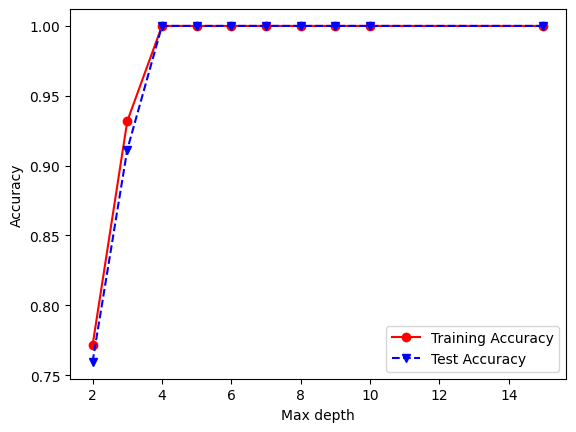

In [5]:
plt.plot(maxdepths,trainAcc_DT,'ro-',maxdepths,testAcc_DT,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Train Decision Tree Model "Model_DecisionTree"
Using the optimal elbow depth found in the previous segment which is 4

In [6]:
model_decisionTree = DecisionTreeClassifier(max_depth=4)
model_decisionTree = model_decisionTree.fit(X_train_DT, Y_train_DT)

Y_predTrain = model_decisionTree.predict(X_train_DT)
Y_predTest = model_decisionTree.predict(X_test_DT)

trainAcc_DT = accuracy_score(Y_train_DT, Y_predTrain)
testAcc_DT = accuracy_score(Y_test_DT, Y_predTest)

print("Training Accuracy: ", trainAcc_DT)
print("Testing Accuracy: ", testAcc_DT)

Training Accuracy:  1.0
Testing Accuracy:  1.0


Save the trained observation step predictor

In [8]:
# Ensure the 'trained_models' directory exists
os.makedirs('trained_models', exist_ok=True)

# Save the trained model to a file
joblib.dump(model_decisionTree, 'trained_models/model_DecisionTree.pkl')

NameError: name 'os' is not defined